In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset_path = '../../datasets/house_dataset.csv'

In [3]:
df = pd.read_csv(dataset_path, delimiter=';')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
0,11410000,7420,4,1,2,yes,yes,yes,no,yes
1,10850000,7500,3,3,1,yes,no,yes,no,yes
2,10150000,8580,4,3,4,yes,no,no,no,yes
3,10150000,16200,5,3,2,yes,no,no,no,no
4,9870000,8100,4,1,2,yes,yes,yes,no,yes


In [4]:
yes_flag_list = ['y', 'yes']

def get_bool_value_from_string(str_value:str):
    return 1 if str_value.strip().lower() in yes_flag_list else 0


In [5]:
df['mainroad'] = df['mainroad'].apply(lambda x: get_bool_value_from_string(x))
df['guestroom'] = df['guestroom'].apply(lambda x: get_bool_value_from_string(x))
df['basement'] = df['basement'].apply(lambda x: get_bool_value_from_string(x))
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: get_bool_value_from_string(x))
df['airconditioning'] = df['airconditioning'].apply(lambda x: get_bool_value_from_string(x))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
0,11410000,7420,4,1,2,1,1,1,0,1
1,10850000,7500,3,3,1,1,0,1,0,1
2,10150000,8580,4,3,4,1,0,0,0,1
3,10150000,16200,5,3,2,1,0,0,0,0
4,9870000,8100,4,1,2,1,1,1,0,1


In [6]:
before = len(df)

# df = df[df['price'] <= 10000000]
# df = df[df['area'] <= 12000]

df = df.drop_duplicates()

after = len(df)

print(f'Count before drop duplicates: {before}')
print(f'Count after drop duplicates: {after}')

Count before drop duplicates: 541
Count after drop duplicates: 541


In [7]:
# df = df.drop(columns=['basement'])

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
count,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,4.709524e+06,5126.072089,2.959335,1.277264,1.798521,0.857671,0.179298,0.349353,0.046211,0.312384
std,1.753909e+06,2157.389271,0.736741,0.487644,0.863926,0.349711,0.383956,0.477207,0.210135,0.463895
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3584.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4520.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.141000e+07,16200.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.dtypes

price              int64
area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int64
guestroom          int64
basement           int64
hotwaterheating    int64
airconditioning    int64
dtype: object

In [10]:
# df = pd.get_dummies(df)
# df.head()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# y = df['value']
X = df.drop(columns=['price'])
# X = df[[column for column in df.columns if column.startswith('product_') or column == 'discount']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE (Erro Absoluto Médio): {mae}')
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')


MAE (Erro Absoluto Médio): 919787.171423981
MSE (Erro Quadrático Médio): 1606923152724.2847
R² (Coeficiente de Determinação): 0.5979782690500706


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [15]:
# Função para formatar os números em milhares ou milhões
def format_axes(x, pos):
    if x >= 1e6:
        # Para milhões (1e6 = 1,000,000)
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:
        # Para milhares (1e3 = 1,000)
        return f'{x*1e-3:.1f}K'
    else:
        # Para valores menores que mil
        return f'{x:.0f}'


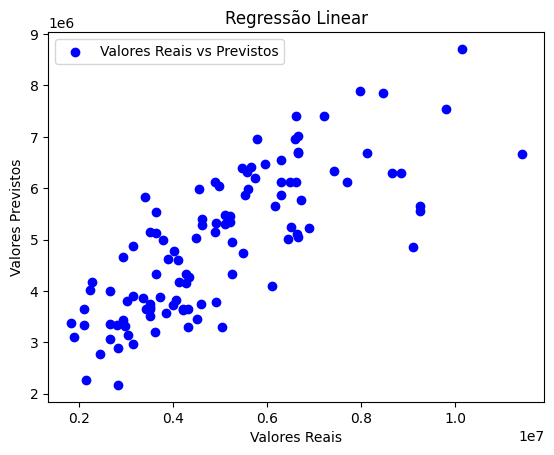

In [16]:
plt.scatter(y_test, y_pred, color='blue', label='Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear')
plt.legend()
plt.show()


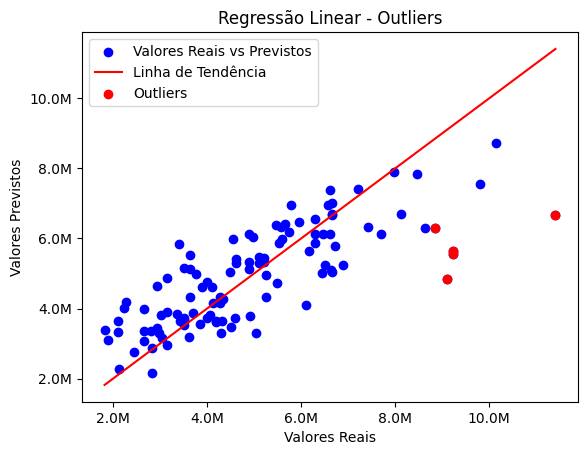

In [17]:
residuals = y_pred - y_test
std_dev = np.std(residuals)
outliers = np.abs(residuals) > 2 * std_dev

plt.scatter(y_test, y_pred, color='blue', label='Valores Reais vs Previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Linha de Tendência')
plt.scatter(y_test[outliers], y_pred[outliers], color='red', label='Outliers')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear - Outliers')
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_axes))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axes))
plt.show()


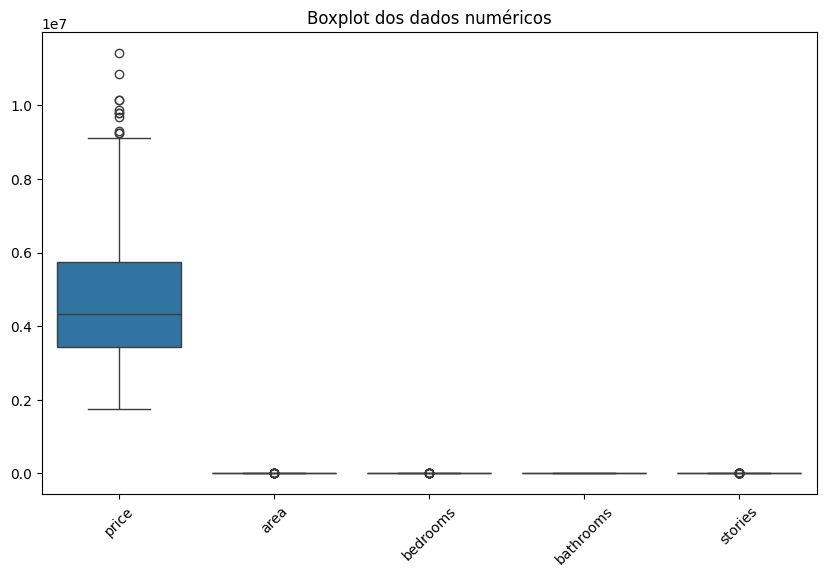

In [18]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot dos dados numéricos')
plt.xticks(rotation=45)
plt.show()


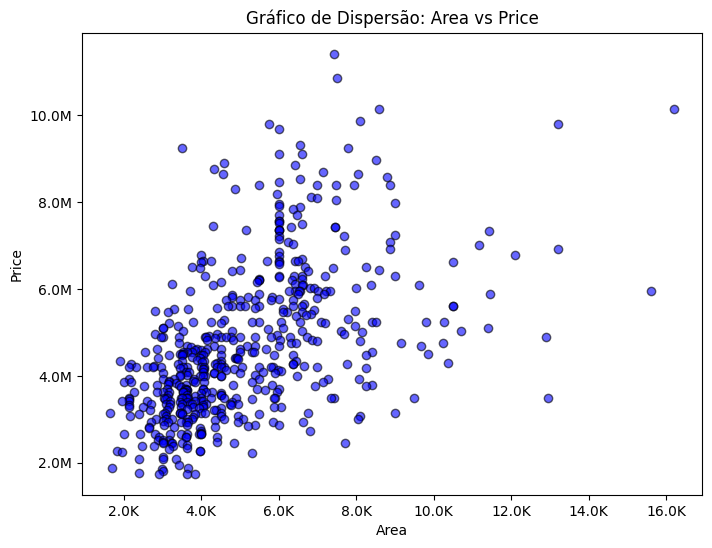

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'], alpha=0.6, color='b', edgecolors='k')
plt.title('Gráfico de Dispersão: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_axes))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axes))
plt.show()


In [20]:
import joblib

In [21]:
joblib.dump(model, 'house_price_linear_regression_model.pkl')


['house_price_linear_regression_model.pkl']